# ***Amazon Reviews on Women's Dresses.***


***E-commerce (electronic commerce) is the activity of electronically buying or selling of products on online services or over the Internet. While one purchases a product, platform gives them the leverage to share the experience with their product. Through feedbacks of all kind, any platform seeks to get better and better and to satisfy their customers as best as they can. After analyzing what they rate the product as, what they write for it etc. etc. we can derive many patterns out of customers satisfaction sphere which can be taken care of in the future.***

***This dataset mainly consists of the feedback of women customers who brought dresses from Amazon shopping App.***
***The attributes mentioned in the dataset are as follows:***  

**- s.no : Simply, the Index!**

**-age : Age of the customer.**

**-division_name : Division of the Cloth customer has bought**  

**-department_name : Department of the Cloth** 

**-class_name : Class of the Cloth in particular.**

**-clothing_id : Clothing ID (Unique to a type of product)**

**-title : Title customers write on their feedback/review text**  

**-review_text : Customer's Review Text**  

**-alikefeedbackcount : Number of other customers who agrees with the given feedback (as their experience is quite the same)**  

**-rating : Rating or stars they've given to the product**  

**-recommend_index : Whether they'll recommend someone to buy the product or not (0: NO, 1:YES)**

## ***The entire workflow of this Study will be as follows:***
* ***Big Picture***
* ***Data Preprocessing/Data Cleaning***
* ***Data Analysis***
* ***Data Visualization***
* ***Model Building***


In [3]:
#importing packages:
import pandas as pd
import string
import re
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly as plty
import plotly.express as px

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data = pd.read_csv("/content/Women Dresses Reviews Dataset .csv")
data.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


# ***1). Big Picture:***

In [5]:
data.shape

(23486, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   s.no                  23486 non-null  int64 
 1   age                   23486 non-null  int64 
 2   division_name         23472 non-null  object
 3   department_name       23472 non-null  object
 4   class_name            23472 non-null  object
 5   clothing_id           23486 non-null  int64 
 6   title                 19676 non-null  object
 7   review_text           22641 non-null  object
 8   alike_feedback_count  23486 non-null  int64 
 9   rating                23486 non-null  int64 
 10  recommend_index       23486 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [7]:
missing_count = data.isnull().sum()
missing_count
percentage_missing_values = round(data.isnull().sum()/len(data)*100,1)
missing_df = pd.concat([missing_count, percentage_missing_values], axis = 1)
missing_df.columns = ['Missing Values','Percentage of Missing Values(%)']
missing_df

,Missing Values,Percentage of Missing Values(%)
s.no,0,0.0
age,0,0.0
division_name,14,0.1
department_name,14,0.1
class_name,14,0.1
clothing_id,0,0.0
title,3810,16.2
review_text,845,3.6
alike_feedback_count,0,0.0
rating,0,0.0


*Clearly, from the above two commands we understand that this dataset consists of 23,486 rows and 11 fields. Moreover we can observe the missing values in atrributes such as divison_name, department_name, class_name, title and review_text.*

*As per the basic understanding, the percentage of missing values in attributes such as divison_name, dept_name and class_name is very less. Due to this, we will delete those values as it will not impact our study.On the other hand, attributes such as title, review_text are completely dependent on each user/customer due to which we are unable to predict or treat those values.*

# ***2). Data Cleaning/Pre-processing:***

## ***-> Treating the Missing Values:***

***a). We will first treat the NA's in divison_name, Department_name and Class_name before going ahead.***

In [8]:
division_missing = data[data['division_name'].isnull()== True]
division_missing 

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
593,593,34,NaN,NaN,NaN,184,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,5,1
2275,2275,36,NaN,NaN,NaN,152,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",0,5,1
4349,4349,43,NaN,NaN,NaN,665,So worth it!,Got these on sale...absolutely love eberjey! f...,0,5,1
4745,4745,50,NaN,NaN,NaN,772,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,0,5,1
7589,7589,39,NaN,NaN,NaN,152,"""long and warm""",These leg warmers are perfect for me. they are...,0,5,1
8163,8163,25,NaN,NaN,NaN,72,My favorite socks!!!,"I never write reviews, but these socks are so ...",0,5,1
8333,8333,36,NaN,NaN,NaN,136,Super socks,I love these little socks ? and the dots spark...,0,5,1
14464,14464,54,NaN,NaN,NaN,184,New workhorse,These tights are amazing! if i care for them w...,0,5,1
14670,14670,49,NaN,NaN,NaN,492,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,0,5,1
15513,15513,37,NaN,NaN,NaN,152,Love!,I am loving these. they are quite long but are...,0,5,1


*The observation that needs to be made here is that - there are 14 missing values for division_name and these are the same missing values for
department_name and class_name.*
*Since we have relevant information with respect to title and review_text,we will not delete these data records directly. This is because these 2 variables are very crucial for sentiment analysis.*



***b). We will now drop the missing values where both title and review_text are NA.***

In [9]:
# Division_name, department_name, class_name, title and review_text are missing:
data[data['title'].isnull() & data['review_text'].isnull() & data['division_name'].isnull() & data['department_name'].isnull() & data['class_name'].isnull()]


,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
22325,22325,48,NaN,NaN,NaN,492,NaN,NaN,0,5,1


In [10]:
data = data[data['s.no'] != 22325]
data.shape

(23485, 11)

*In the above record, we have no information with respect to any of the variables. Thus, we will drop it from the dataset.*

In [11]:
# Both Review_text and Title are missing:
df_review_title_na = data[data['title'].isnull() & data['review_text'].isnull()]
df_review_title_na

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
69,69,43,General,Dresses,Dresses,1078,NaN,NaN,0,5,1
87,87,38,General,Bottoms,Jeans,1037,NaN,NaN,0,3,0
97,97,53,General,Bottoms,Jeans,1033,NaN,NaN,0,5,1
102,102,52,General Petite,Dresses,Dresses,1081,NaN,NaN,0,5,1
124,124,39,General Petite,Tops,Blouses,828,NaN,NaN,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23270,23270,34,General,Dresses,Dresses,1083,NaN,NaN,0,4,1
23276,23276,61,General,Tops,Knits,854,NaN,NaN,0,4,1
23331,23331,55,General,Tops,Blouses,836,NaN,NaN,0,1,0
23370,23370,56,General,Jackets,Jackets,984,NaN,NaN,0,5,1


*We observe that there are 844 datapoints where both title and review_text are missing from the query above. This will result in information loss, since the other attributes contain relevant information, so deleting these 844 values will result in information loss.*



In [12]:
data.drop(data[data['title'].isnull() & data['review_text'].isnull()].index, inplace = True)
data.shape

(22642, 11)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22642 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   s.no                  22642 non-null  int64 
 1   age                   22642 non-null  int64 
 2   division_name         22629 non-null  object
 3   department_name       22629 non-null  object
 4   class_name            22629 non-null  object
 5   clothing_id           22642 non-null  int64 
 6   title                 19676 non-null  object
 7   review_text           22641 non-null  object
 8   alike_feedback_count  22642 non-null  int64 
 9   rating                22642 non-null  int64 
 10  recommend_index       22642 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 2.1+ MB


# ***-> Removing Contractions:***

*There are so many contractions in the text we type so to expand them we will use the contractions library. For example, the text “I’ll eat pizza” and if we remove the punctuations them the text will look like this “I ll will eat pizza”. Here, “I ll” doesn’t hold any information to the text that’s why we use the contraction.*

In [14]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
data['review_text']=data['review_text'].apply(lambda x:expand_contractions(str(x)))

# ***-> Lower Casing the data:***

*Since Sentiment Analysis requries 2 main attributes i.e Title and review, we will focus on these variables and convert into lowercase.*

***a).*** ***Conversion of Title variable into Lowercase:***

In [15]:
#Title Variable:
print('Title Variable before Conversion:')
print()

data['title'].head(3)

Title Variable before Conversion:



0    Amazing fit and wash
1      Lovely and unique!
2                     Meh
Name: title, dtype: object

In [16]:
print('Title Variable After Conversion: ')
print()

data['title'] = data['title'].str.lower()
data['title'].head(3)

Title Variable After Conversion: 



0    amazing fit and wash
1      lovely and unique!
2                     meh
Name: title, dtype: object

***b).*** ***Conversion of Review_text variable into Lowercase:***

In [17]:
print('Review_text before Conversion: ')
print()
data['review_text'].head(3)

Review_text before Conversion: 



0    Like other reviewers i was hesitant to spend t...
1    As is true of a bunch of the fall clothing pho...
2    I so wanted this skirt to work, love the desig...
Name: review_text, dtype: object

In [18]:
print('Review_text after Conversion : ')
print()

data['review_text'] = data['review_text'].str.lower()
data['review_text'].head(3)

Review_text after Conversion : 



0    like other reviewers i was hesitant to spend t...
1    as is true of a bunch of the fall clothing pho...
2    i so wanted this skirt to work, love the desig...
Name: review_text, dtype: object

# ***-> Removing Punctutations:***

*Removing the Punctutaions in the text data is the second method that is to be followed as it will help in treating both data and Data! equally.*

In [19]:
# Removing Punctutaions from both Title and review_text variables:
data['title'] = data['title'].str.replace('[{}]'.format(string.punctuation), '')
data['review_text'] = data['review_text'].str.replace('[{}]'.format(string.punctuation),"")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
data.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,amazing fit and wash,like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,lovely and unique,as is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,meh,i so wanted this skirt to work love the design...,3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,wow,love love this i was hesitant to buy this at f...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,great for bigger busts,i absolutely love the retro look of this swims...,0,5,1


# ***-> Removing Numbers:***

*Sometimes number doesn’t hold any vital information in the text depending upon the use cases. So it is better to remove them than to keep them.*



In [21]:
data['title'] = data['title'].str.replace('[0-9]','')
data['review_text'] = data['review_text'].str.replace('[0-9]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


# **-> Removing Stopwords:**

*Stopwords are the most common words of a language like ‘I’, ‘this’, ‘is’, ‘in’ which do not add much value to the meaning of a document. These values are removed to decrease the dataset size and increase focus on meaningful words.*

In [22]:
# Replacing the missing values of title and review_text with dummy 'na_null' value as removing the stopwords 
#from a dataframe consisting of null values will throw an error.
data['title'] = data['title'].fillna("")
data['review_text'] = data['review_text'].fillna('')

In [23]:
data[data['title'] == '']

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
14,14,71,General Petite,Jackets,Jackets,984,,love it the bit of stretch in the denim makes ...,0,5,1
19,19,35,General Petite,Tops,Blouses,835,,beautiful top i love the peplum the color is a...,2,3,1
23,23,37,General,Tops,Blouses,837,,very nice but thin materal very sheer i paired...,0,5,1
34,34,75,Initmates,Intimate,Lounge,623,,these shorts are super comfy and the color is ...,1,5,1
48,48,21,General Petite,Tops,Blouses,830,,i just purchased this blouse in store the fabr...,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23464,23464,54,General Petite,Bottoms,Pants,1068,,i got this before the winter so i could wear i...,0,4,1
23465,23465,37,General,Tops,Knits,865,,great shirt i am a tshirt wearing girl so i li...,2,5,1
23479,23479,52,General,Tops,Knits,860,,nice twist on a basic tshirt pictures do not t...,0,4,1
23480,23480,36,General,Dresses,Dresses,1099,,i have to agree with the first reviewer i real...,2,1,0


In [24]:
stop = stopwords.words('english')

data['title'] = data['title'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stop)]))
data['review_text'] = data['review_text'].apply(lambda x: " ".join([word for word in x.split() if word not in (stop)]))


In [25]:
data.head(3)

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,amazing fit wash,like reviewers hesitant spend much pair jeans ...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,lovely unique,true bunch fall clothing photos colors totally...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,meh,wanted skirt work love design way way long lb ...,3,1,0


***Clearlt, the stopwords have been removed.***

# **-> Stemming:**

In [26]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

#splitting the sentences:
data['title'] = data['title'].str.split()
data['review_text'] = data['review_text'].str.split()

In [27]:
#performing stemming and replacing it:
data['title'] = data['title'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
data['review_text'] = data['review_text'].apply(lambda x: [stemmer.stem(y) for y in x])

In [28]:
data.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,"[amaz, fit, wash]","[like, review, hesit, spend, much, pair, jean,...",0,5,1
1,1,62,General Petite,Tops,Blouses,850,"[love, uniqu]","[true, bunch, fall, cloth, photo, color, total...",12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,[meh],"[want, skirt, work, love, design, way, way, lo...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,[wow],"[love, love, hesit, buy, first, review, made, ...",0,5,1
4,4,37,Initmates,Intimate,Swim,24,"[great, bigger, bust]","[absolut, love, retro, look, swimsuit, first, ...",0,5,1


*The basic Cleaning of the given data is completed. Note that we have replaced the missing values of Title variable with dummy value named '' for time being.*

# ***3). Data Analysis.***

# ***-> Outlier Detection and Treatment:***

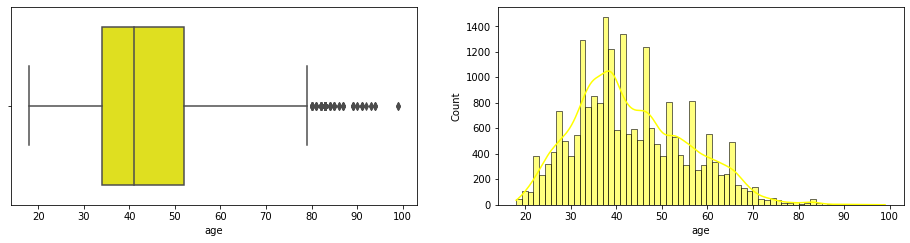

In [29]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(x = 'age', data = data, color = 'yellow')
plt.subplot(2,2,2)
sns.histplot(data = data, x = 'age', kde = True, color = 'yellow')

*From the above 2 diagrams, the presence of outliers is evident with respect to the Age variable. Another observation to make is that Age attribute is postively skewed due to which will be using the IQR method to impute these outliers.*

In [30]:
# Creating a function to treat outliers:

def detect_outliers_iqr(data):
    """ Function to detect and handle outliers using IQR."""
    
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    IQR = q3-q1
    
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
  
    data = np.where(data < lwr_bound, lwr_bound, data)
    data = np.where(data > upr_bound, upr_bound, data)
    
    return data 


In [31]:
#calling the function:
data['age'] = detect_outliers_iqr(data['age'])

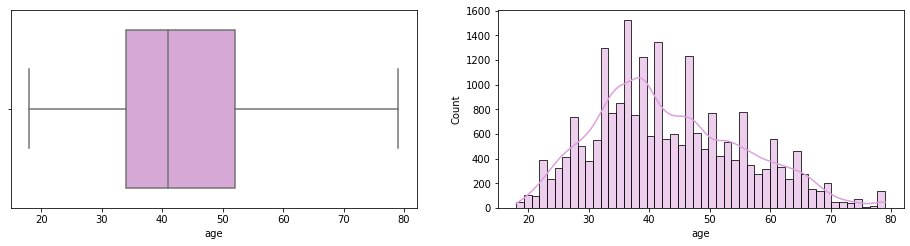

In [32]:
# After treating the outliers:

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(x = 'age', data = data, color = 'plum')
plt.subplot(2,2,2)
sns.histplot(data = data, x = 'age', kde = True, color = 'plum')

# ***4). Data Visualization:***

# ***i). Univariate Analysis:***

# ***-> Understanding the distribution of Age:***

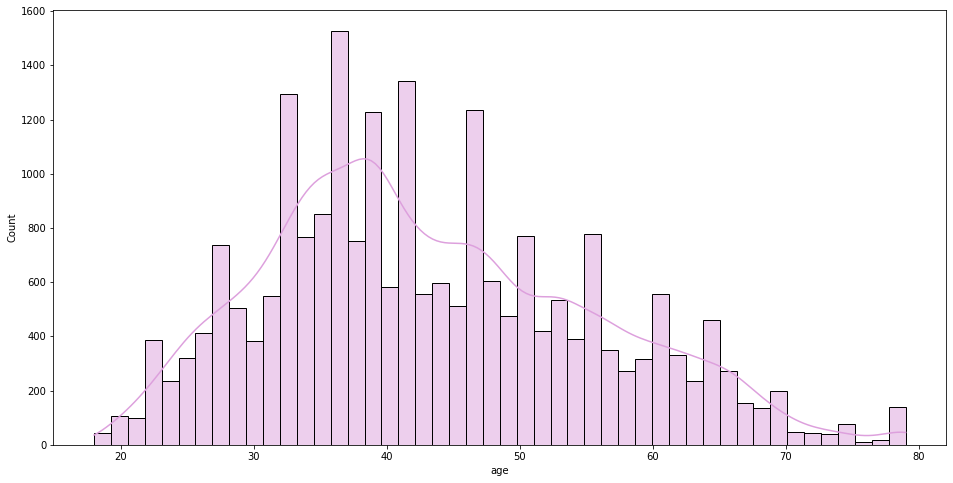

In [33]:
plt.figure(figsize = (16,8))
sns.histplot(x = 'age', data = data, color = 'plum', kde = True)

*From the above diagram, its very evident that 'Age' variable is positively skewed implying that most of customers fall in the category of [30-40] old. Moreover, we have already treated the outliers w.r.t this variable by using the IQR method.*

# ***-> Determining the distribution of Department, Class and Divison:***

In [34]:
fig = px.histogram(data, x = 'division_name')
fig.update_traces(marker_color = px.colors.qualitative.Pastel, marker_line_width=1.5)
fig.update_layout(title_text='DISTRIBUTION OF DIFFERENT DIVISIONS')
fig.show()


In [35]:
fig = px.histogram(data, x = 'department_name')
fig.update_traces(marker_color = px.colors.qualitative.Dark2, marker_line_width=1.5)
fig.update_layout(title_text='DISTRIBUTION OF DIFFERENT DEPARTMENTS')
fig.show()

In [36]:
fig = px.histogram(data, x = 'class_name')
fig.update_traces(marker_color = px.colors.qualitative.Dark24, marker_line_width=1.5)
fig.update_layout(title_text='DISTRIBUTION OF DIFFERENT CLASSES')
fig.show()

## ***Interpretation:***

- *Different Division : General Petite are usually the products that represents the generic body type whose height is 5.3 ft or under. Clearly the general products are in greater demand which may imply that most of the people in whole belong to general category.*

- *Different Departments: Tops and dresses are highly sold and are in greater demand whereas the least sold products are from trend department/category.*

- *Different Classes: Blouses, Knits and Dresses are the most popular products.*

# ***-> Determining the Top 25 Clothing Ids.***

In [37]:
df = data[data['division_name'].notnull() & data['department_name'].notnull() & data['class_name'].notnull()]

Text(0.5, 1.0, "Top 25 Clothing ID's displayed")

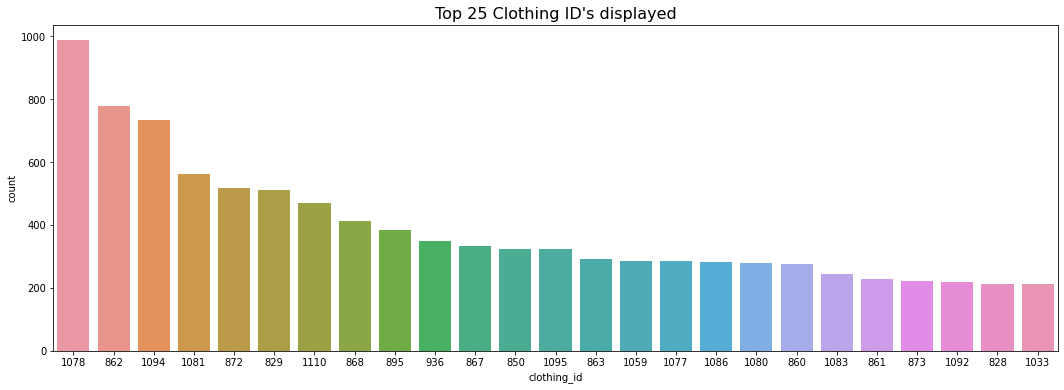

In [38]:
plt.figure(figsize = (18,6))

sns.countplot(x = 'clothing_id', data = df, order = df['clothing_id'].value_counts().index[:25])
plt.title("Top 25 Clothing ID's displayed", fontsize = 16)

# ***Interpretation:***

*Plotting Top 25 clothing id's representing which type of clothes are in demand.*

# ***ii). Bivariate Analysis:***

## -> ***Understanding the Distribution of Division with respect to that of Departments.***

In [39]:
group_div_dept = df.groupby(['division_name', 'department_name'])['department_name'].count()
group_div_dept

division_name   department_name
General         Bottoms            2447
                Dresses            3620
                Jackets             624
                Tops               6580
                Trend                95
General Petite  Bottoms            1215
                Dresses            2526
                Intimate            227
                Jackets             378
                Tops               3468
                Trend                23
Initmates       Intimate           1426
Name: department_name, dtype: int64

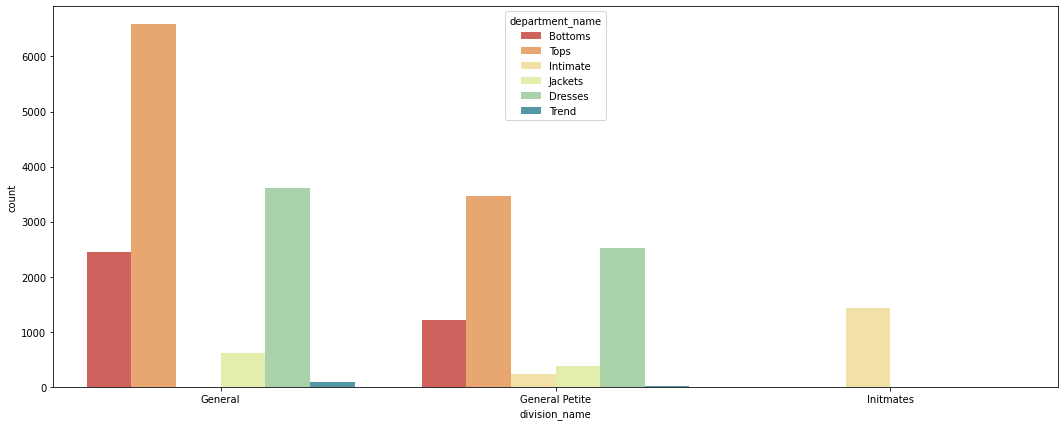

In [40]:
plt.figure(figsize = (18,7))


sns.countplot(x = 'division_name', hue = 'department_name', data = df, palette = "Spectral")

## ***Interpretation:***

*Among all the divisions, the most sold products are tops as well dresses and the least sold products would be trend.*

# ***-> Determining the average rating in each of the departments:***

In [41]:
avg_dpt_rating = df.groupby('department_name')['rating'].mean()
avg_dpt_rating 

department_name
Bottoms     4.278809
Dresses     4.138952
Intimate    4.271022
Jackets     4.254491
Tops        4.157743
Trend       3.838983
Name: rating, dtype: float64

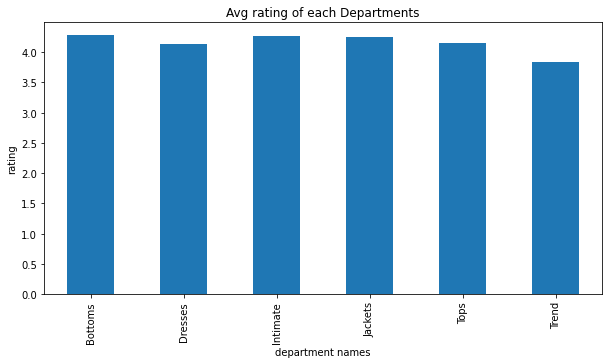

In [42]:
avg_dpt_rating.plot(kind = 'bar', title = 'Avg rating of each Departments', ylabel = 'rating', xlabel = 'department names', figsize = (10,5))

## ***Interpretation:***

*From the above-mentioned graph corresponding to the distribution of departments in each of the divisions, we clearly understand that tops and dresses are the most sold products. Yet, the average rating in each of these departments is comparatively less (i.e., 4.15 approx and 4,13 approx). This may imply that even though people buy these products more, they may not be entirely happy with the products either.*

*The second observation to be made here is that the least sold products are trends and their average rating is also the least implying the products are not great.*

*Thirdly, the average rating for intimate products is the highest!*

*Therefore, the company needs to focus on improving the quality of tops and dresses as the demand for these products is comparatively higher thereby bringing in better revenue for the organization and also improving the quality of that of trends.*

# ***iii). Determining the average rating in each of the Classes:***

In [43]:
fig = px.histogram(data, x = 'class_name')
fig.update_traces(marker_color = px.colors.qualitative.Pastel, marker_line_width=1.5)
fig.update_layout(title_text='DISTRIBUTION OF DIFFERENT CLASSES')
fig.show()

In [44]:
df_rating_classes = df[['class_name','rating']]

df_rating_classes.head()

,class_name,rating
0,Jeans,5
1,Blouses,5
2,Skirts,1
3,Pants,5
4,Swim,5


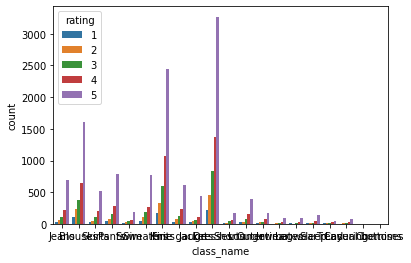

In [45]:
sns.countplot(x = 'class_name', hue = 'rating', data = df_rating_classes)

# ***-> Determining the relationship between recommendation_index and each of the departments and that of classes.***

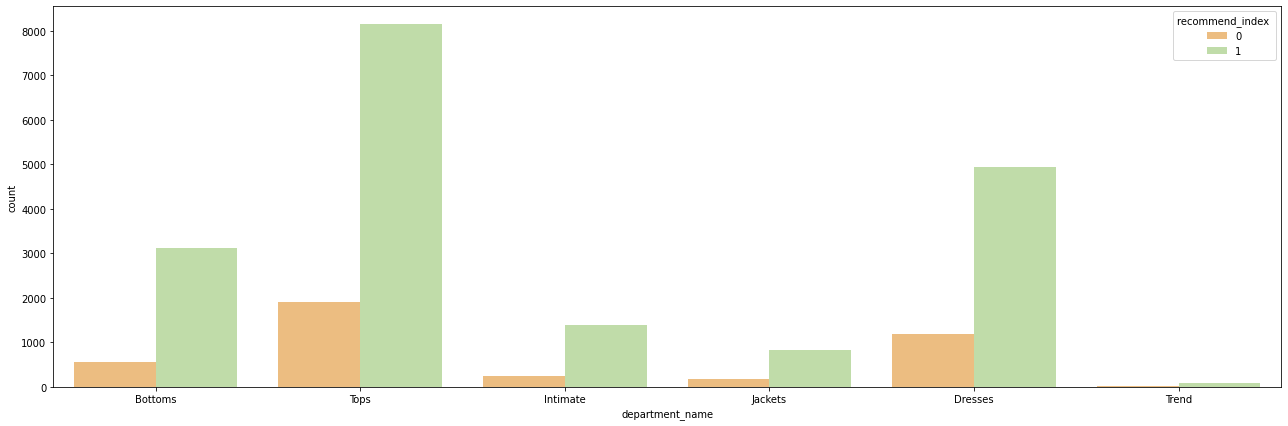

In [46]:
#Departments:
df_recom_dept = df[['department_name','recommend_index ']]

plt.figure(figsize = (22,7))
sns.countplot(x = 'department_name', hue = 'recommend_index ', data = df_recom_dept, palette = 'Spectral')

In [47]:
# Classes: 

tops = df[df['department_name'] == 'Tops']
tops['class_name'].value_counts()

Knits         4626
Blouses       2983
Sweaters      1380
Fine gauge    1059
Name: class_name, dtype: int64

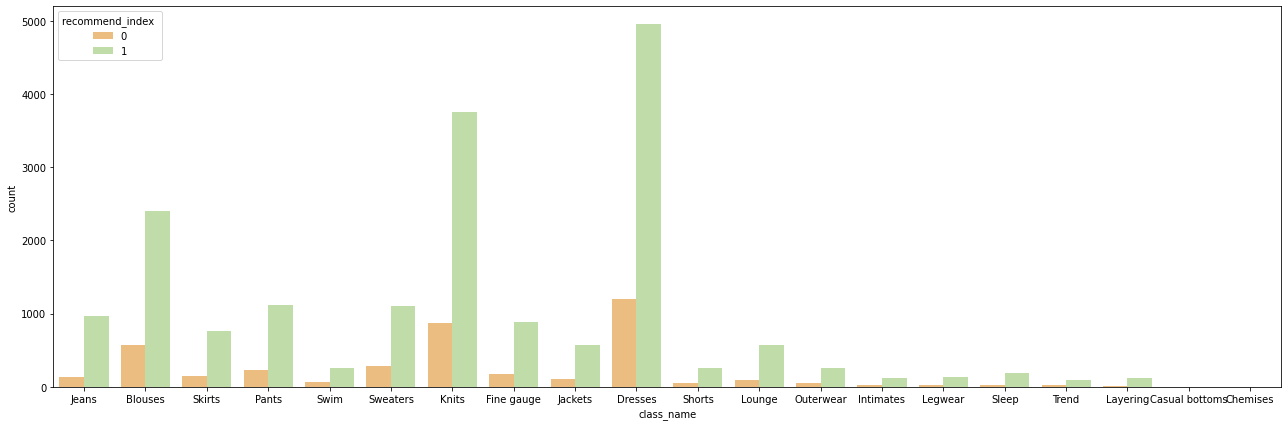

In [48]:
#creating a dataframe of classes and recommend_index to make the work easier.
df_recom_class = df[['class_name','recommend_index ']]


plt.figure(figsize = (22,7))
sns.countplot(x = 'class_name', hue = 'recommend_index ', data = df_recom_class, palette = 'Spectral')

## ***Interpretation:***

*From the above 2 graphs, its very evident that overall feedback/recommendation is good as the count for recommendation index = 1 (i.e yes) is significantly more.*

# ***-> Understanding the relationship between Age and Recommendation Index.*** 

<Figure size 1224x720 with 0 Axes>

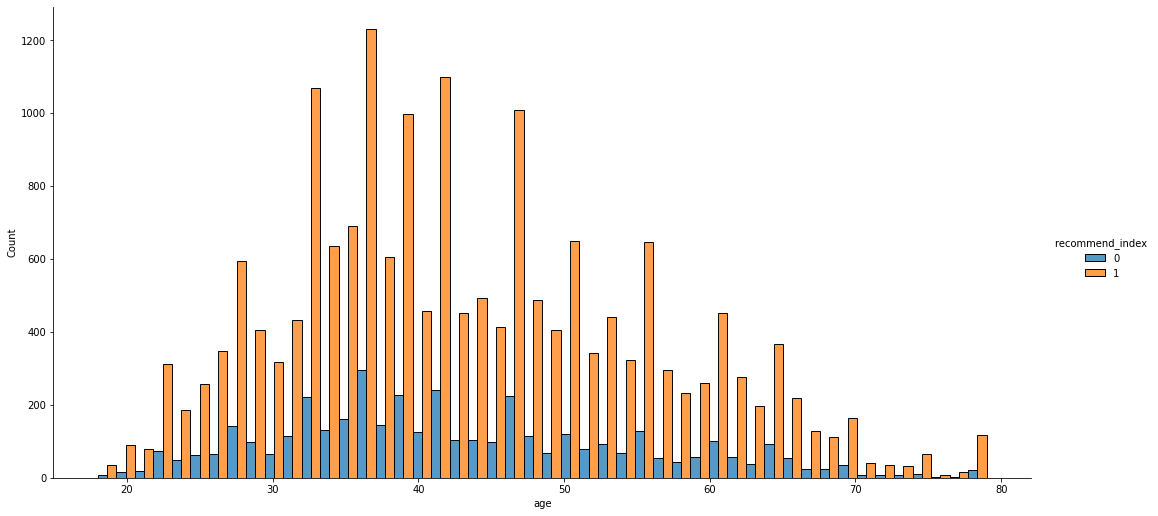

In [49]:
plt.figure(figsize = (17,10))

ax = sns.displot(df, x = 'age', hue = 'recommend_index ', multiple = "dodge", height=7.27, aspect=16.7/8.27)


## ***Interpretation:***

*Age groups ranging from 23/24 to almost 70 we can observe that there is signicant difference w.r.t the recommendation given by the customers meaning most of the customers belonging to the above age groups recommend the products they buy.*

*In particular the customers with age 38/39, they highly recommend the product.*

# ***iii). Trivariate Analysis:***

## ***-> Determing the ratings in each of the departments and Classes.***

Text(0.5, 1.0, 'Ratings in each of the Departments')

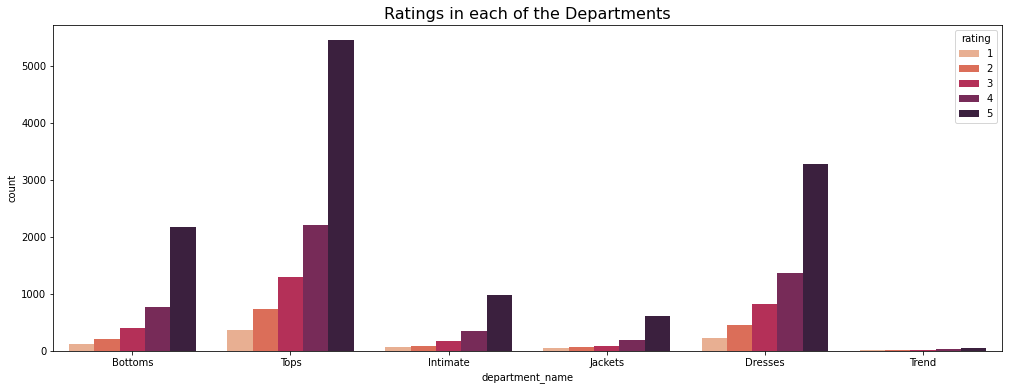

In [50]:
plt.figure(figsize = (17,6))
sns.countplot(x = 'department_name', hue = 'rating', data = df, palette = 'rocket_r')
plt.title('Ratings in each of the Departments', fontsize = 16)


In [ ]:
#creating a dataframe for class_name and ratings alone.
df1 = df[['class_name','rating']]


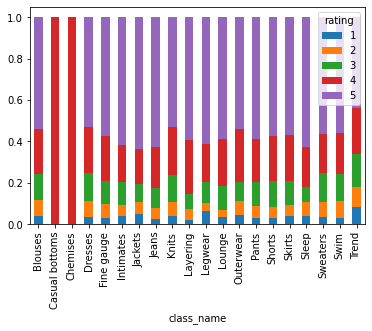

In [71]:
rating_classes = pd.crosstab(df1['class_name'], df1['rating'])
rating_classes.div(rating_classes.sum(1).astype(float), axis = 0). plot(kind = 'bar', stacked = True)

## ***Interpretation:***

*With respect to both departments and Classes, we can say overall the rating is good.*

- *Departments : Least 1 and 2 ratings is given to both Intimates and Jackets departments whereas trend is the only category/department where the demand is also very low and rating 5 is also the least.*

- *Classes : Both Casual Bottom and Chemsis are the only 2 classes with ratings 4.*

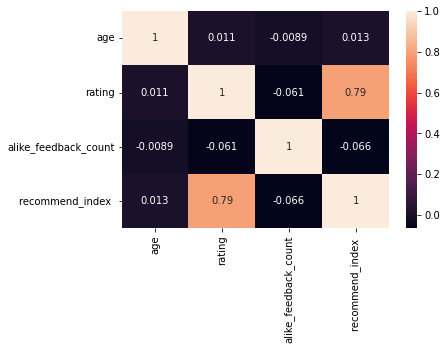

In [83]:
corr_data = df[['age','rating','alike_feedback_count', 'recommend_index ']]

sns.heatmap(corr_data.corr(), annot = True)

## ***Interpretation:***

*From the above heatmap, we observe that the correlation between recommend_index and rating is 0.79 which is closer to 1 meaning the customers who are happy with the products(i.e provide good ratings) are the only one's who are likely to recommend the products to others.*